# Portfolio 2
Student Name: **Chi Thanh Liu**  
StudentID: **45728046**   
URL: (https://github.com/MQCOMP2200-S2-2020/portfolio-2020-Thanh-Liu)

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [2]:
# read dataset.
testing_data = pd.read_csv('data/testing.csv')
training_data = pd.read_csv('data/training.csv')

In [3]:
# look at the number of columns and rows in data set.
print(testing_data.shape)
print(training_data.shape)

(4932, 32)
(14803, 32)


In [4]:
#combine training and testing data.
frames = [training_data, testing_data]
combine_df = pd.concat(frames)

In [5]:
print(combine_df.shape)
combine_df.head()

(19735, 32)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


## Time-series data 

In [6]:
# create new dataframe only contains Date and Appliances.
appliance_data = pd.DataFrame({'Date': combine_df.date,
                              'Appliances': combine_df.Appliances})
appliance_data.Date = pd.to_datetime(appliance_data.Date)
appliance_data.set_index('Date', inplace = True)

<Figure size 1440x576 with 0 Axes>

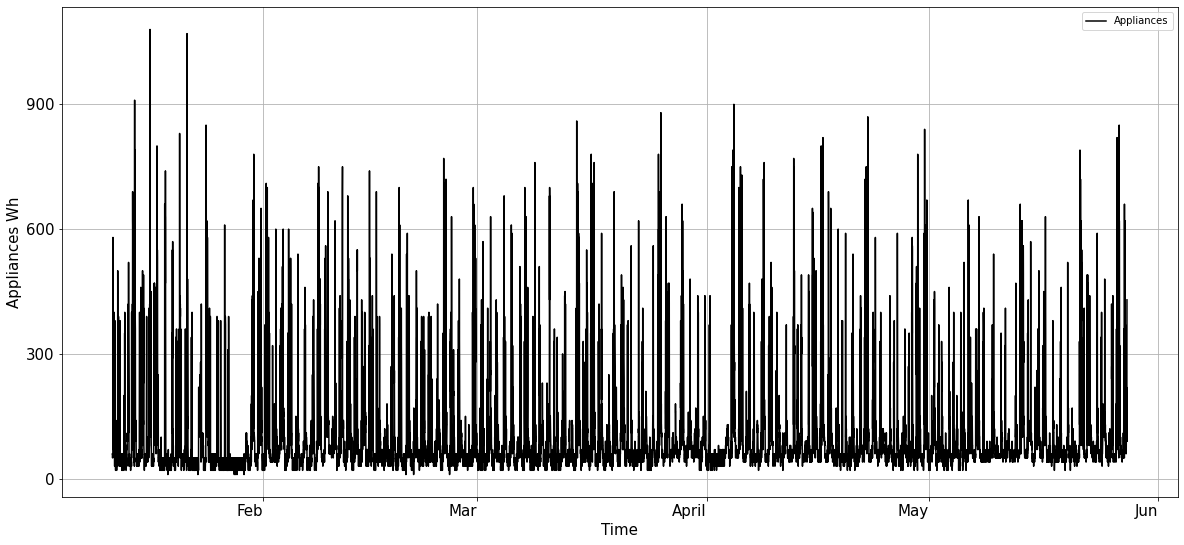

In [7]:
# reproduce the line graph displaying the energy consumption in the whole period.
import matplotlib.dates as mdates
months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter("%m")
plt.figure(figsize=(20,8))
appliance_data.plot(color = 'k')
ax = plt.gca()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.set_xticklabels(['Feb','Mar','April','May','Jun'], rotation = 0,size =15)
ax.grid()
plt.xlabel('Time',size = 15) 
plt.ylabel('Appliances Wh',size =15) 
plt.yticks(np.arange(0, 1000, 300))
plt.setp(ax.get_yticklabels(), fontsize=15)
plt.gcf().set_size_inches(20, 10)

## Comment: 
As we can see from the graph, in January, the energy was consumed more than other months. In January, there were days that people used electricity more than 1000Wh while the highest amount of consumed electricity was 900 Wh in other months. 

In [8]:
# create new dataset in a week from 2016-01-11 to 2016-01-18.
new_data = combine_df.loc[(combine_df['date']>='2016-01-11 17:00:00 ') & (combine_df['date']<='2016-01-18 17:00:00')]
# create new dataframe only contains Date and Appliances in a week.
appliance_data1 = pd.DataFrame({'Date': new_data.date,
                              'Appliances': new_data.Appliances})
appliance_data1.Date = pd.to_datetime(new_data.date)
appliance_data1.set_index('Date', inplace = True)

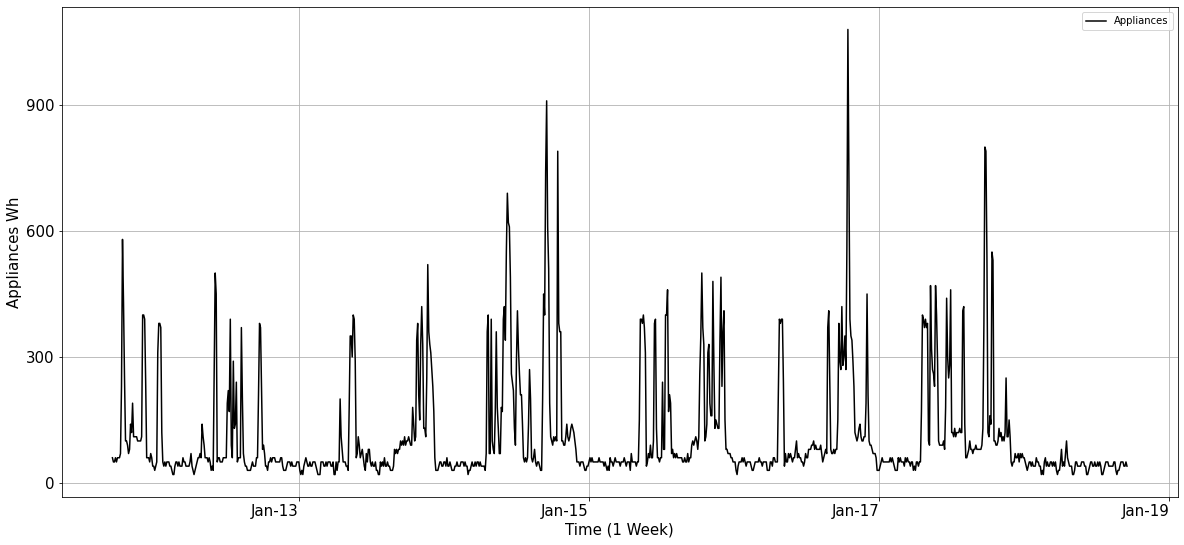

In [9]:
# reproduce the line graph displaying the energy consumption in a week.
days = mdates.DayLocator(interval =2 )  # every day
days_fmt = mdates.DateFormatter("%m-%d")
appliance_data1.plot(color = 'k')
ax = plt.gca()
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_fmt)
ax.set_xticklabels(['Jan-13','Jan-15','Jan-17','Jan-19'],rotation = 0,size = 15)
ax.grid()
ax.legend(['Appliances'])
plt.xlabel('Time (1 Week)',size=15) 
plt.ylabel('Appliances Wh',size = 15) 
plt.yticks(np.arange(0, 1000, 300))
plt.setp(ax.get_yticklabels(), fontsize=15)
plt.gcf().set_size_inches(20, 10)

## Comment:
As we can see from the graph, the graph shows the amount of consumed electricity in a week from 2016-01-11 to 2016-01-18. The highest amount of consumed electricity was more than 900 Wh 

## Distribution of Appliances

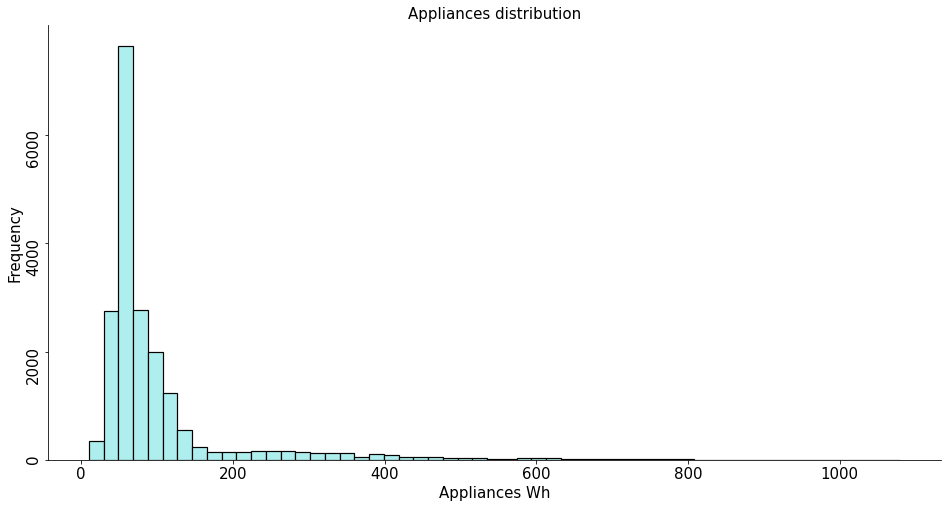

In [10]:
#histogram
plt.figure(figsize=(16,8))
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.hist(combine_df.Appliances, bins = 55, color = 'paleturquoise', edgecolor='black', linewidth=1.2)
plt.title("Appliances distribution",fontsize=15)
plt.xlabel("Appliances Wh", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.yticks(np.arange(0, 7000, 2000),rotation =90, fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

### Comment:
As can be seen from the histogram, the data distribution has a long tail. Perhaps, there are some outliers. The common amount of consumed energy was in a range from 0 to 200 Wh, and the highest is probably about 60 Wh.

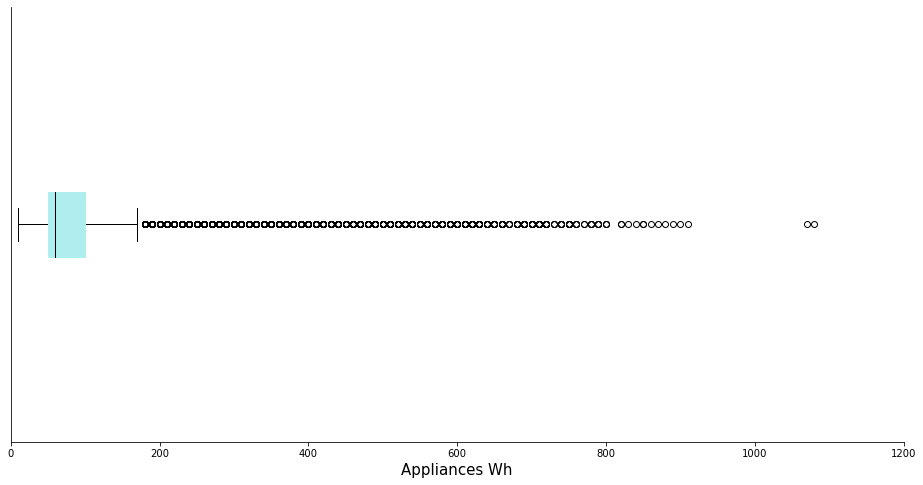

In [11]:
#boxplot
plt.figure(figsize=(16,8))
c = 'paleturquoise'
d = 'k'
plt.boxplot(combine_df.Appliances, patch_artist=True, vert = False,
            boxprops=dict(facecolor=c, color=c),
            whiskerprops=dict(color=d),
            medianprops=dict(color=d),
            )
plt.xlabel('Appliances Wh',fontsize = 15)
plt.xlim(0,1200)
plt.yticks([])
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.show()

### Comment:
In the boxplot, the median has a value of 60 Wh. While the lower whisker has a value of 10 Wh, the upper whisker has a value of 170 Wh. There are several outliers in the boxplot.

## Pairsplot

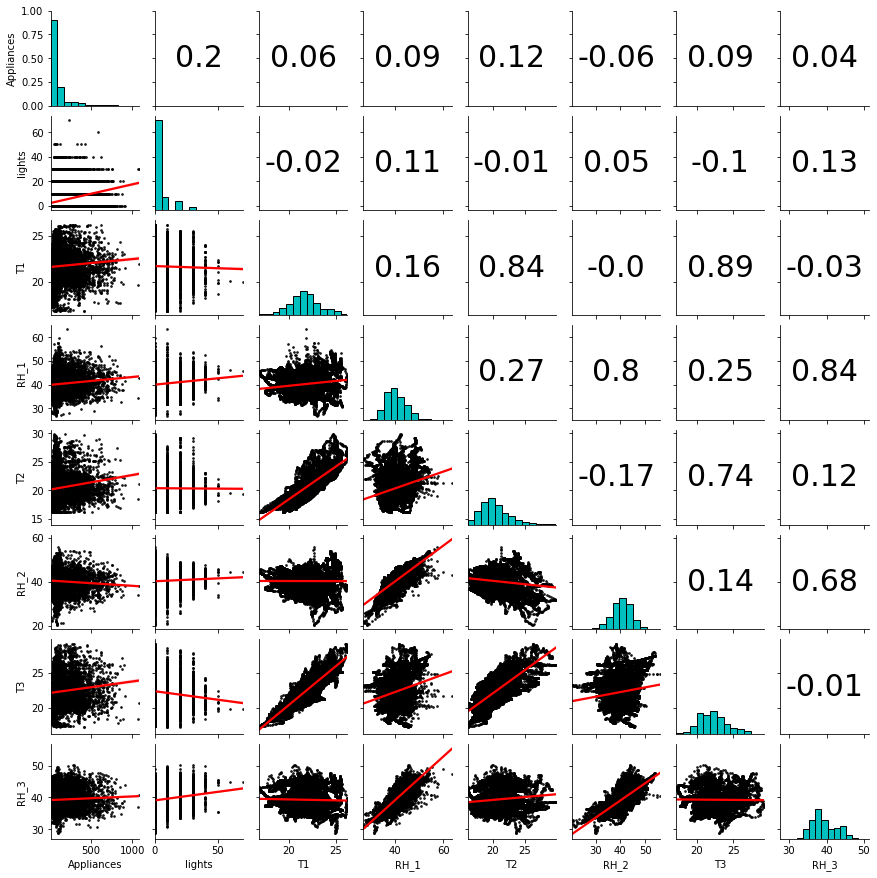

In [12]:
# The first pairsplot
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 30)
    
scatterdata = combine_df[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist, color = 'c', edgecolor = 'black', bins = 13)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

### Comment:
As can be seen from the first pairsplot. There  is a positive correlation between the energy consumption of appliances and lights (0.20). The second largest is between appliances and T2. There still has a negative correlation between appliances and RH_3.

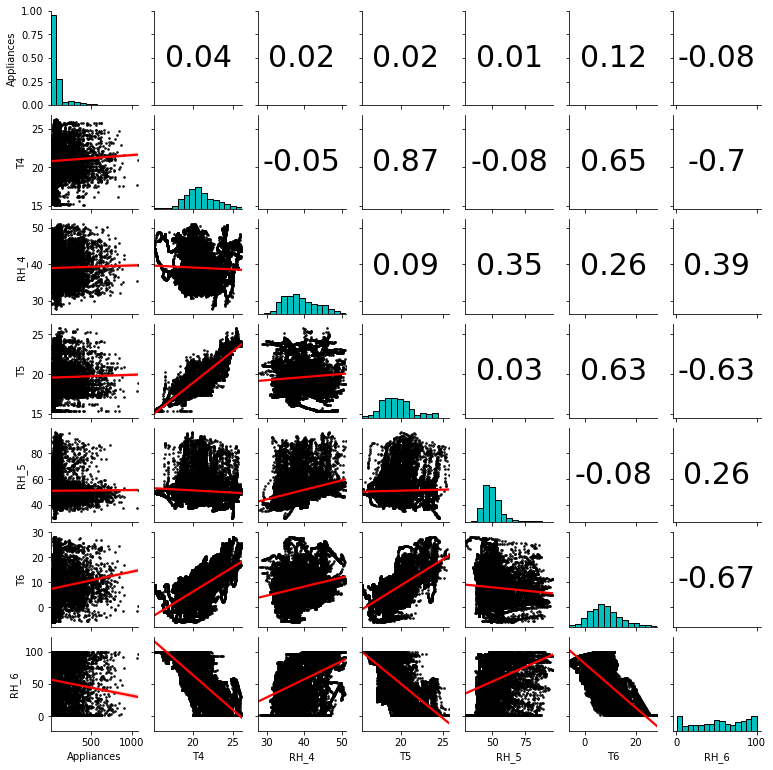

In [13]:
# The second pairsplot
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 30)
    
scatterdata = combine_df[['Appliances','T4','RH_4','T5','RH_5','T6','RH_6']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist, color = 'c',edgecolor = 'black', bins = 15)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

### Comment:
The second pairsplot shows the relationship between the energy consumption of appliances with: T4, RH_4, T5, RH_5, T6, RH_6.
The largest correlation is that a positive correlation between appliances and T6 is 0.12. There is a negative correlation between Appliances and RH_6 (-0.08).

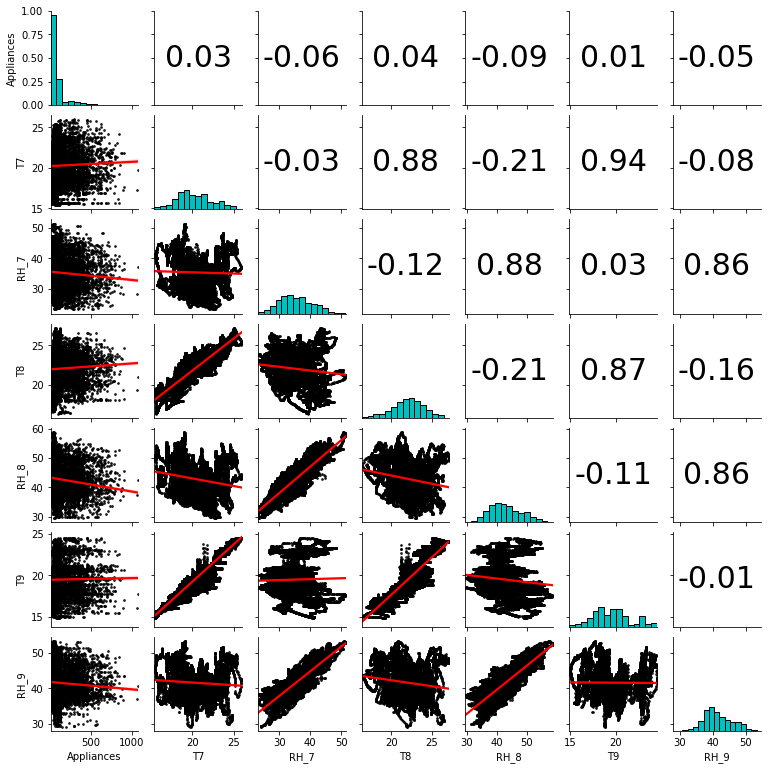

In [14]:
# The third pairsplot
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 30)
    
scatterdata = combine_df[['Appliances','T7','RH_7','T8','RH_8','T9','RH_9']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist,color = 'c',edgecolor = 'black', bins = 15)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

### Comment:
The third pairsplot demonstrates the relationship between the consumed electricity of appliances with: T7, RH_7, T8, RH_8, T9, RH_9. The correlation in this parisplot is quite low. The largest is 0.04 between Appliances and T8. There are many negative correlations in the third pairsplot. 

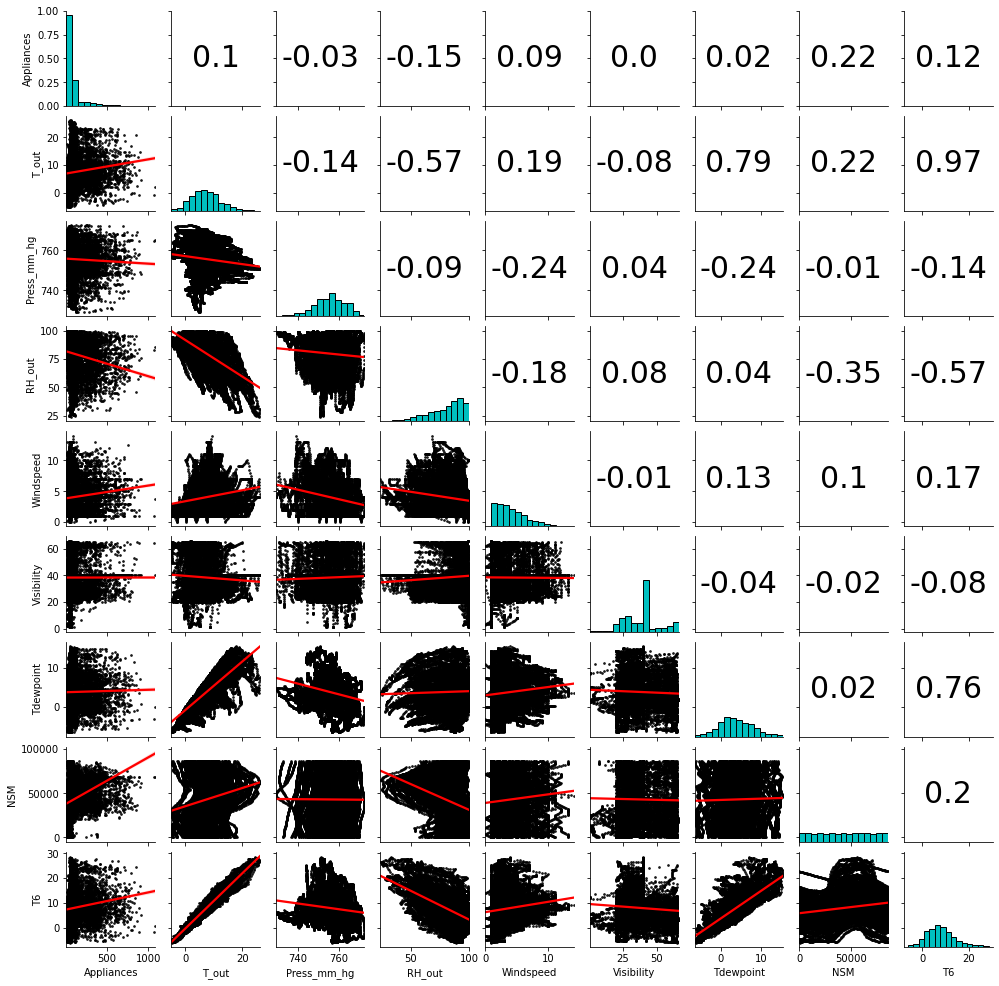

In [15]:
# The fourth pairsplot
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 30)
    
scatterdata = combine_df[['Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','NSM','T6']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist,color = 'c',edgecolor = 'black',bins = 15)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

### Comment:
The last pairsplot represents the relationship between the energy consumption of Appliances with: T_out, Press, RH_out, Windspeed, Visibility, Tdewpoint, NSM, and T6. There is a positive correlation between Appliances and NSM (0.22). In this pairsplot, we can easily to see that there is no relationship between Appliances and Visibility. 

## Heat Map:

In [16]:
df = pd.DataFrame({'Date': new_data.date,
                   'Appliances': new_data.Appliances})
df.Date = pd.to_datetime(new_data.date)
df['hours'] = df.Date.dt.hour
df['day_name'] = df['Date'].dt.day_name()
df2 = pd.pivot_table(df[['day_name', 'hours', 'Appliances']], index=['day_name', 'hours'], aggfunc='sum')
df2.head()

Appliances
day_name hours            
Friday   0             320
         1             310
         2             280
         3             260
         4             300

In [17]:
df3 = df2.unstack(level=0)
df3 = df3.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

Text(44.587500000000006, 0.5, 'hour of day')

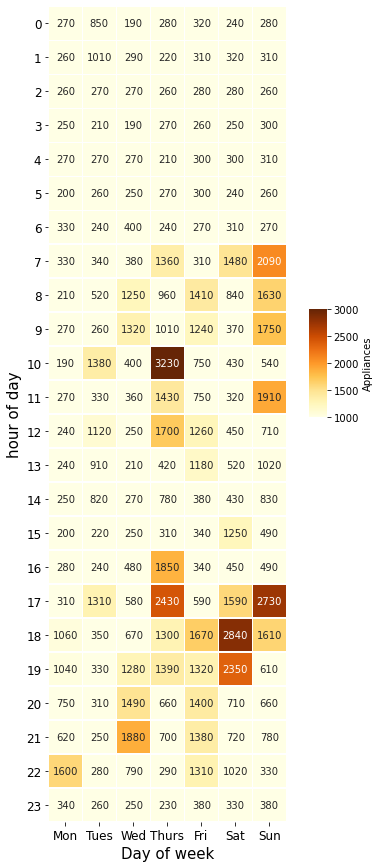

In [18]:
f, ax = plt.subplots(figsize=(5, 15))
cbar_ax = f.add_axes([.905, .5, .05, .1])
ax = sns.heatmap(df3,  annot=True,
                 fmt="d", linewidths=.5, ax=ax, xticklabels=day_short_names,
                cmap="YlOrBr",square=True,vmin = 1000,vmax = 3000,cbar_ax = cbar_ax,
                cbar_kws={'label': 'Appliances'})
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize = 12)
ax.set_xlabel("Day of week", size = 15)
ax.set_ylabel("hour of day", size = 15)

### Comment:
The heatmap shows the hourly energy consumption of appliances in a week (2016-01-11 - 2016-01-18). As can be clearly seen, there is a strong time component in the energy consumption pattern. The energy consumption starts to rise around 6 in the morning. Then around noon, there are energy load surges. The energy demand also increases around 6 pm. The energy demand starts to decrease from 10 pm. There is no clear pattern regarding the day of the week.

## Models Performance:

In [19]:
training = pd.get_dummies(training_data, columns=['WeekStatus','Day_of_week'])
testing =pd.get_dummies(testing_data, columns=['WeekStatus','Day_of_week'])

In [20]:
training.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,61200,1,0,0,1,0,0,0,0,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,61800,1,0,0,1,0,0,0,0,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,62400,1,0,0,1,0,0,0,0,0
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,63600,1,0,0,1,0,0,0,0,0
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,64200,1,0,0,1,0,0,0,0,0


In [21]:
X_train = training.drop(['date','Appliances','rv1','rv2'],axis = 1)
y_train = training['Appliances']
X_test = testing.drop(['date','Appliances','rv1','rv2'], axis =1)
y_test = testing['Appliances']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (14803, 35)
y_train shape:  (14803,)
X_test shape:  (4932, 35)
y_test shape:  (4932,)


In [22]:
# Training Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [24]:
# Test on Training data
mse = mean_squared_error(y_train, y_hat_train)
r2 = r2_score(y_train, y_hat_train)
mae = mean_absolute_error(y_train, y_hat_train)
mape = np.mean(np.abs((y_train - y_hat_train) / y_train)) * 100
print("RMSE:", np.sqrt(mse))
print("R Squared:", r2)
print("MAE:", mae)
print("MAPE%:", mape)

RMSE: 93.20818501242448
R Squared: 0.17829770259775424
MAE: 53.134135487758066
MAPE%: 61.32090138994557


In [25]:
# Test on Testing data
mse = mean_squared_error(y_test, y_hat_test)
r2 = r2_score(y_test, y_hat_test)
mae = mean_absolute_error(y_test, y_hat_test)
mape = np.mean(np.abs((y_test - y_hat_test) / y_test)) * 100
print("RMSE:", np.sqrt(mse))
print("R Squared:", r2)
print("MAE:", mae)
print("MAPE%:", mape)

RMSE: 93.17607638358322
R Squared: 0.1590135881301421
MAE: 51.97453623832799
MAPE%: 59.93542814904305


### Comment:
After dropping 4 columns which are not essential, I used 35 predictors to predict Appliances. In this case, I used Linear Regression to fit model, and tested the model in training data and testing data to calculate RMSE, r2_score, MAE, MAPE. As can be seen that, when I tried to test the data based on testing data, r2_score decreased from 0.18 to 0.16. Although r2_score did not decrease significantly, it was quite small to evaluate this model fit the data.

## Residual Plot:

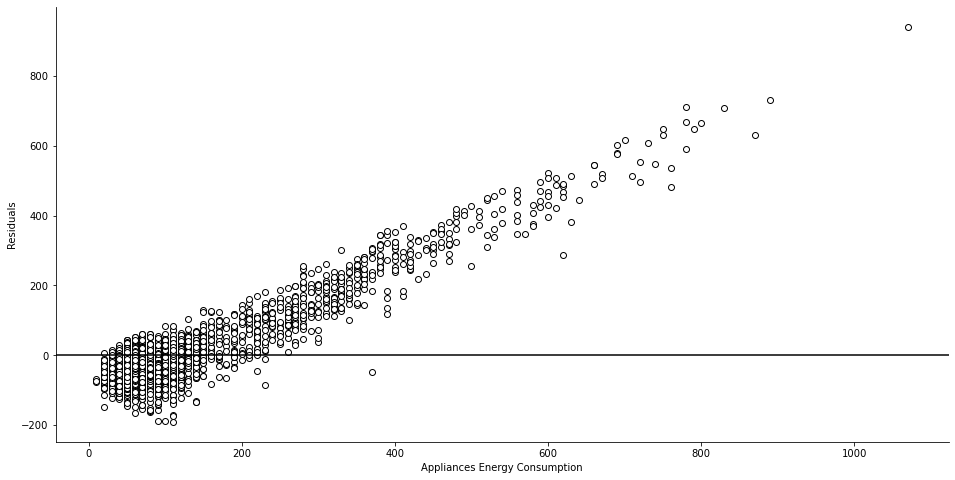

In [26]:
plt.figure(figsize=(16,8))
residual = y_test.values-y_hat_test
plt.scatter(y_test, residual, color="white", edgecolor='black')
plt.xlabel('Appliances Energy Consumption')
plt.ylabel('Residuals')
plt.axhline(0, color='black')

## Comment:
We can see obviously that the relationship between the variables and the energy consumption of appliances is not well represented by the linear model since the residuals are not normally distributed around the horizontal axis.

## RFE

In [27]:
from sklearn.feature_selection import RFE

In [28]:
estimator = LinearRegression()
rmse_scores = []
for i in range(1,36):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)
    y_test_pred = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "features: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 features:  101.26888895164174
RMSE score on test set using 2 features:  99.12399407311729
RMSE score on test set using 3 features:  98.92249989546323
RMSE score on test set using 4 features:  97.97137950937748
RMSE score on test set using 5 features:  97.87877773888789
RMSE score on test set using 6 features:  97.79879832642702
RMSE score on test set using 7 features:  97.54264516067863
RMSE score on test set using 8 features:  97.4383034495254
RMSE score on test set using 9 features:  96.97841033120521
RMSE score on test set using 10 features:  95.04617607469439
RMSE score on test set using 11 features:  95.02193708768031
RMSE score on test set using 12 features:  94.9073006369462
RMSE score on test set using 13 features:  94.68863860202237
RMSE score on test set using 14 features:  94.70687758710378
RMSE score on test set using 15 features:  94.68431856934914
RMSE score on test set using 16 features:  94.69881903708233
RMSE score on test set using 17 fe

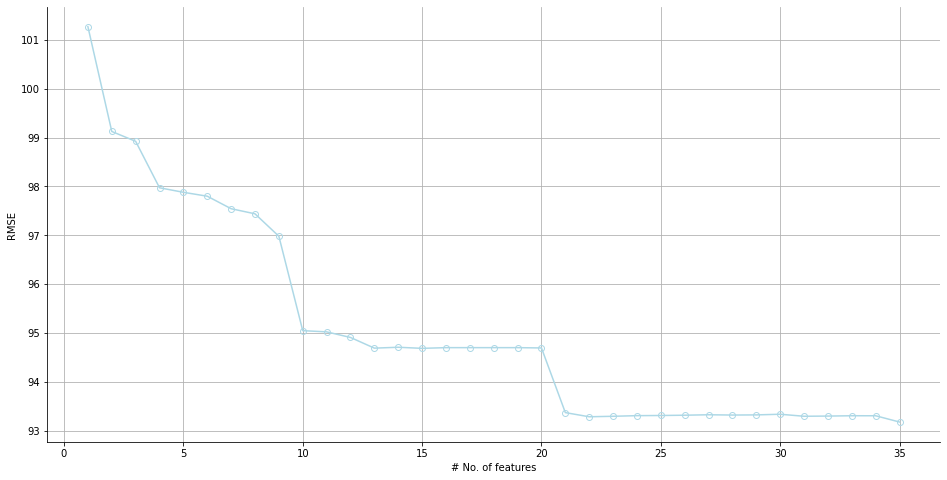

In [29]:
plt.figure(figsize=(16,8))
plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('RMSE')
plt.plot(range(1, 36),rmse_scores , marker = 'o'
         , color = 'lightblue', markeredgewidth = 1 
         ,markeredgecolor = 'lightblue', markerfacecolor = 'None')

## Feature Importance Using RFECV

In [30]:
lr = LinearRegression()
k = StratifiedKFold(n_splits=10)
rfecv = RFECV(estimator=lr, step=1, cv=k, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

C:\Users\liuth\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Optimal number of features : 22
Best features : Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'T8', 'RH_8',
       'T9', 'T_out', 'Windspeed', 'WeekStatus_Weekday', 'WeekStatus_Weekend',
       'Day_of_week_Friday', 'Day_of_week_Monday', 'Day_of_week_Saturday',
       'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday'],
      dtype='object')


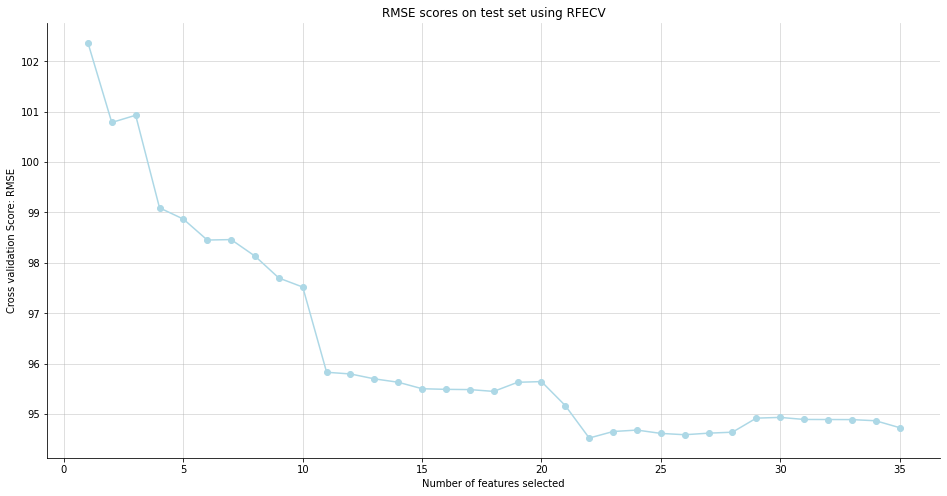

In [31]:
# Plot number of features VS. cross-validation scores RMSE
plt.figure(figsize=(16,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Score: RMSE")
plt.title('RMSE scores on test set using RFECV')

rmse_cv_scores = np.sqrt(-rfecv.grid_scores_)

p = plt.plot(range(1, len(rfecv.grid_scores_) + 1), rmse_cv_scores, marker='o', color='lightblue')
plt.grid(alpha=0.5)
plt.show()

### Comment:
In this case, to test how many variables are optimal to minimize the RMSE the recursive feature elimination and cross-validated (RFECV) is used to select the optimal inputs. Follow to the textbook, I also trained model with 10 cross Fold Cross-Validation.  In the textbook, they used the random forest regression method to train the model. However, in my portfolio, I used linear regression method. Therefore, my result could be different. I found that there are 22 optimal number of features instead of 34 optimal number of features in textbook. 

### Answer some questions from Portfolio 2 tasks pdf file:

* In my opinion, the weather data obtained from a nearby weather station representative is enough to improve the appliances energy consumption prediction.
* The temperature and humidity measurements from a wireless network can help in the energy prediction. From the pairsplots, there are relationships between Appliances and temperature and humidity. Moreover, temperature and humidity are parameters are the most important in energy prediction after implementing feature selection.
* From all the data used in prediction models, parameters are the most important in energy prediction such as 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'T8', 'RH_8','T9', 'T_out', 'Windspeed', 'WeekStatus_Weekday', 'WeekStatus_Weekend','Day_of_week_Friday', 'Day_of_week_Monday', 'Day_of_week_Saturday','Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday','Day_of_week_Wednesday'